## 3821Б1ПР1 Кашин Степан

# 8. Плохо обусловленные матрицы

Провести серию экспериментов, тестирующую команды `scipy.linalg.solve`, `numpy.linalg.cond`
на плохо обусловленных матрицах вида
$A=LU$, где $L$, $U$ – случайные нижняя треугольная и верхняя треугольная
матрицы соответственно с малыми диагональными элементами.

Экспериментальным путем для каждого из перечисленных классов установить
диапазон изменения порядка матрицы, при котором число обусловленности не
превосходит ведичины порядка $10^{16}$. Построить графики значений,
выдаваемых функцией `scipy.linalg.cond`. Построить графики используемого этими функциями времени. Для каждой
матрицы задать случайно решение $x$. По матрице $A$ и решению $x$
сгенерировать правую часть системы линейных уравнений $b$. Решить систему
$Ax=b$, используя `scipy.linalg.solve`. Построить графики относительной ошибки
решения и невязки. Объяснить результаты.

Импортируем функции `cornd,norm` из `numpy.linalg` теперь к ним можно обращаться напрямую (`cond, norm`), так-же `solve`
Импортируем библиотеки `matplotlib.pyplot` и `numpy`

`littel` - задает порядок малости диагональных элементов 

`percCond` - список, в котором хранятся результаты проверки на >$10^{16}$

`condGraf` - список чисел обусловленности


`timeCond` - список, в котором хранится время выполнения функции `numpy.linalg.cond`

`timeSolve` - список, в котором хранится время выполнения функции `numpy.linalg.solve`

`nvList` - список неувязок

`misteces` - список относительных ошибок решения

In [4]:
from numpy.linalg import cond, norm 
from scipy.linalg import solve
import matplotlib.pyplot
import numpy
import time

import warnings
warnings.filterwarnings("ignore") 
# Игнорируем предупреждения вызваны тем, что библиотека обрабатывала плохо обусловленные матрицы.

littel=10 # задает порядок малости диагональных элементов
percCond=[] # список, в котором хранятся результаты проверки на 10^16
condGraf=[] # список чисел обусловленности
timeCond=[] # список, в котором хранится время выполнения функции numpy.linalg.cond
timeSolve=[] # список, в котором хранится время выполнения функции numpy.linalg.solve
nvList=[] # список неувязок
misteces=[] # список относительных ошибок решения

Проведём исследование на матрицах n порадка где n $1\le n
\le 99$. Программа будет генерировать треугольные матрицы $U$,$L$,диоганальные элементы в которых будут маыми, поэтому разделим эти элементы на некую величину. После этого мы получим матрицу через произведение матриц $L$ и $U$ `A=L.dot(U)`. 

После получение матрицы $A$ оцениваем время работы `numpy.linalg.cond` & `numpy.linalg.solve` и порядок числа обусловленности.

Далее Формируется вектор $B$ на основе соотношения $AX=B$  `b=a.dot(x)`, где $X$ - случайно сгенерированный вектор.


In [5]:
for N in range(1, 100):
    U = numpy.triu(numpy.random.rand(N, N))
    L = numpy.tril(numpy.random.rand(N, N))
    
    for i in range(N):
        U[i][i] = U[i][i] / littel
        L[i][i] = L[i][i] / littel
        
    A = L.dot(U)
    
    
    FirstTime = time.time() #засекаем время на начало работы numpy.linalg.cond
    
    for i in range(10**3):
        cond_a=cond(A)
        
    RealTime=time.time()-FirstTime # получаем время работы numpy.linalg.cond вычив из текущего времени время на начало работы numpy.linalg.cond  
    timeCond.append(RealTime)
    
    # Оцениваем порядок числа обусловленности
    if cond_a>10**16:
        percCond.append(">")
    else:
        percCond.append("<")    
    condGraf.append(cond_a)#Число обусловленности print(cond_a) 
    
    
    X=numpy.random.rand(N) #Генирируем случайное решение X
    B=A.dot(X)
    
    FirstTime = time.time() #засекаем время на начало работы numpy.linalg.solve
    
    X1=solve(A,B)
    
    RealTime=time.time()-FirstTime 
    # получаем время работы numpy.linalg.solve вычив из текущего времени время на начало работы numpy.linalg.solve  
    timeSolve.append(RealTime)
    
    norm_nvList=norm(X1-X)
    nvList.append(norm_nvList)
    norm_misteces=norm_nvList/norm(X)
    misteces.append(norm_misteces)   

Оценка превосходства числа $10^{16}$

In [10]:
for i in percCond:
    if (i == ">"):
        print("Не превосходят c 1 до " +str(percCond.index(i)-1))
        print("Превосходят c " +str(percCond.index(i)) + " до 99")
        break

Не превосходят c 1 до 7
Превосходят c 8 до 99


1) График чисел обусловленности `condGraf`.

2) График относительная ошибок `misteces`.

3) График временной зависимости `timeCond`.

4) График временной зависимости `timeSolve`.

5) График невязки `nvList`

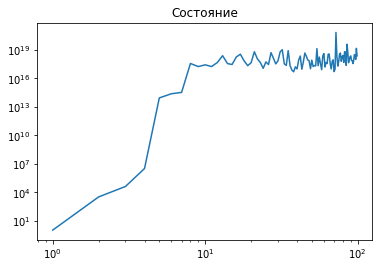

In [20]:
Xline=list(range(1,100))
matplotlib.pyplot.title('Состояние')
matplotlib.pyplot.loglog(Xline, condGraf)

2) Построим график относительной ошибки решения. Мы видим, что график относительных ошибок решения, является показательной функцией относительно порядка матрицы

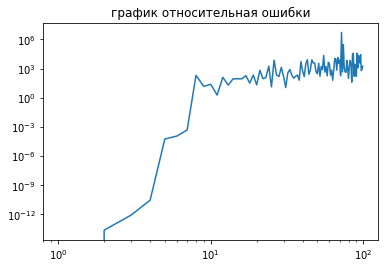

In [21]:
matplotlib.pyplot.title('график относительная ошибки')
matplotlib.pyplot.loglog(Xline,misteces)

3) Построим график зависимости времении `timeCond` выполнения функции `numpy.linalg.cond` к порядоку матрицы. При рассмотрении графика можно заметить линейную зависимость.

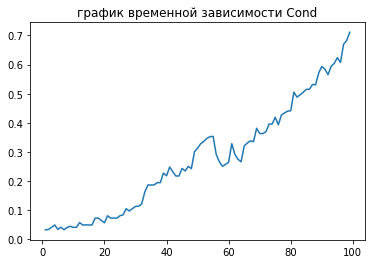

In [22]:
matplotlib.pyplot.title('график временной зависимости Cond')
matplotlib.pyplot.plot(Xline, timeCond)

3) Построим график зависимости времении `timeCond` выполнения функции `numpy.linalg.solve` к порядоку матрицы. При рассмотрении графика можно заметить линейную зависимость.

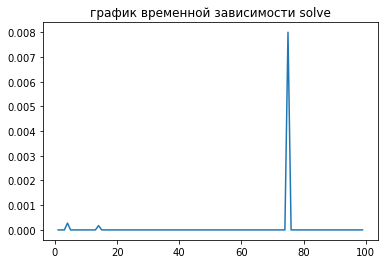

In [23]:
matplotlib.pyplot.title('график временной зависимости solve')
matplotlib.pyplot.plot(Xline, timeSolve)

5)Построим график функция невязки `nvList`. Из графика мы видим, что невязка `nvList`, является показательной функцией относительно порядка матрицы и в точности посторяет график относительных ошибок `misteces`.

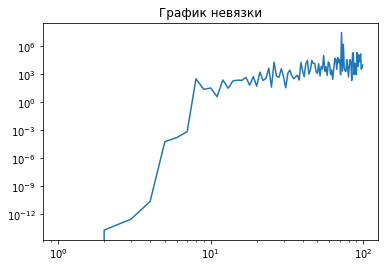

In [24]:
matplotlib.pyplot.title('График невязки')
matplotlib.pyplot.loglog(Xline, nvList)

## Выводы

1.Время работы функции `scipy.linalg.solve` и функции `numpy.linalg.cond` не зависит от диапазона элементов матрицы.

2.Время работы функции `numpy.linalg.cond` и функции `scipy.linalg.solve` не зависит от числа обусловленности матрицы. 

3.Время работы функции `numpy.linalg.cond` и функции `scipy.linalg.solve` зависит от порядка матрицы, причём для cond время растёт квадратично, а для функции solve время растёт кубически. 

4.Относительная ошибка решения и величина критерия невязки растёт с ростом порядка матрицы. Это связано с накоплением ошибок округления. Чем больше порядок матрицы, тем больше ошибок округления накопится.